In [1]:
import sys
import os

# Go two levels up from docs/source/ to reach the project root
# sys.path.insert(0, os.path.abspath('../../'))

import ionerdss as ion
import subprocess
from IPython.display import display, Image

Homo 4mer

In [2]:
pdb_id = '8y7s'
save_folder = '~/Documents/8y7s_dir'

pdb_model = ion.PDBModel(pdb_id=pdb_id, save_dir=save_folder)

# set standard_output=True to see the determined interfaces
pdb_model.coarse_grain(distance_cutoff=0.35, 
                       residue_cutoff=3,
                       show_coarse_grained_structure=False, 
                       save_pymol_script=False, 
                       standard_output=True)

Successfully downloaded assembly file: /Users/sikao/Documents/8y7s_dir/8y7s-assembly1.cif.gz
Binding interfaces detected:
Chain A:
  Center of Mass (COM): (-34.339210510253906, 24.67936134338379, 53.31415557861328)
  Interfaces: ['B', 'E', 'F']
  Interface Coordinates: 
    (-41.347171783447266, 10.364765167236328, 67.06111145019531)
    Interface Energy: -26.91
    (-23.852462768554688, 22.23109245300293, 42.94672775268555)
    Interface Energy: -24.41
    (-29.409713745117188, -3.090428590774536, 42.99185562133789)
    Interface Energy: 0.02
Chain B:
  Center of Mass (COM): (-30.53473663330078, -12.089882850646973, 71.74038696289062)
  Interfaces: ['A', 'E', 'F']
  Interface Coordinates: 
    (-43.43027877807617, 4.43478536605835, 66.61664581298828)
    Interface Energy: -26.91
    (-9.94083309173584, 10.356165885925293, 67.6988296508789)
    Interface Energy: -0.33
    (-16.25308609008789, -15.30644702911377, 68.10027313232422)
    Interface Energy: -32.38
Chain E:
  Center of Mass 

In [3]:
pdb_model.regularize_homologous_chains(dist_threshold_intra=3.5, 
                                       dist_threshold_inter=3.5, 
                                       angle_threshold=25.0, 
                                       show_coarse_grained_structure=False, 
                                       save_pymol_script=True, 
                                       standard_output=False)

Homologous chains identified using sequence alignment:
{'E': 'A', 'F': 'A', 'B': 'A', 'A': 'A'}
Homologous chain groups identified:
[['A', 'B', 'E', 'F']]
Regularized coarse-grained structure saved to /Users/sikao/Documents/8y7s_dir/regularized_coarse_grained_structure.cif.
PyMOL script saved to /Users/sikao/Documents/8y7s_dir/visualize_regularized_coarse_grained.pml.
Model saved successfully to /Users/sikao/Documents/8y7s_dir/8y7s_model.json


PyMOL>load /Users/sikao/Documents/8y7s_dir/regularized_coarse_grained_structure.cif, coarse_grained
 ExecutiveLoad-Detail: Detected mmCIF
 CmdLoad: "/Users/sikao/Documents/8y7s_dir/regularized_coarse_grained_structure.cif" loaded as "coarse_grained".
PyMOL>hide everything
PyMOL>show spheres, name COM
PyMOL>show spheres, name INT
PyMOL>set sphere_scale, 1.0
 Setting: sphere_scale set to 1.00000.
PyMOL>color red, name COM
 Executive: Colored 4 atoms.
PyMOL>color blue, name INT
 Executive: Colored 12 atoms.
PyMOL>pseudoatom com_A, pos=[-34.339, 24.679, 53.314], color=red
 ObjMol: created com_A/PSDO/P/PSD`1 /PS1
PyMOL>pseudoatom int_A_1, pos=[-41.347, 10.365, 67.061], color=blue
 ObjMol: created int_A_1/PSDO/P/PSD`1 /PS1
PyMOL>distance line1, com_A, int_A_1
 Executive: object "line1" created.
PyMOL>set dash_width, 4, line1
 Setting: dash_width set to 4.00000 in object "line1".
PyMOL>set dash_gap, 0.5, line1
 Setting: dash_gap set to 0.50000 in object "line1".
PyMOL>pseudoatom int_A_2, pos=

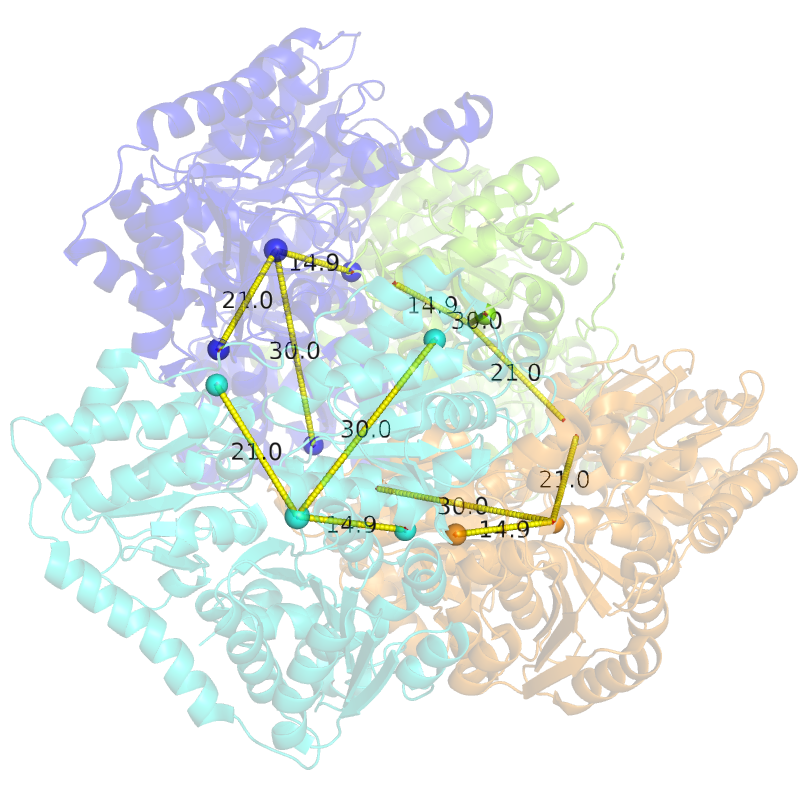

In [4]:
if save_folder.startswith('~'):
    abs_save_folder = os.path.expanduser(save_folder)
abs_save_folder = os.path.abspath(abs_save_folder)

subprocess.run(["pymol", "-cq", f"{abs_save_folder}/visualize_regularized_coarse_grained.pml"], check=True)
display(Image(filename=f"{abs_save_folder}/comparison_regularized.png"))